In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data into a dataframe
data = pd.read_csv('lung_cancer_examples.csv')


In [2]:
data.head()
#show the dataset

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
data = data.drop(['Name','Surname'], axis=1) # Remove name and Surname from the data
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [4]:
# Split data into features and target variable
X = data.drop('Result', axis=1)
y = data['Result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.75
F1-score: 0.8571428571428571


In [7]:
import pickle
with open('model.pkl', 'wb') as f:
    # write the model to the file
    pickle.dump(knn, f)

# close the file
f.close()

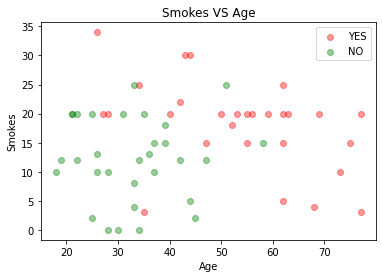

In [22]:
import matplotlib.pyplot as plt
A = data[data.Result == 1]
B = data[data.Result == 0]
plt.scatter(A.Age,A.Smokes,color="RED",label="YES",alpha=0.4)
plt.scatter(B.Age,B.Smokes,color="GREEN",label="NO",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.title("Smokes VS Age")
plt.legend()


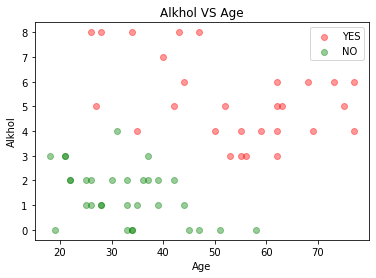

In [21]:
plt.scatter(A.Age,A.Alkhol,color="RED",label="YES",alpha=0.4)
plt.scatter(B.Age,B.Alkhol,color="GREEN",label="NO",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.title("Alkhol VS Age")
plt.legend()

In [20]:
plt.show()